# HEADLINE


#Data Science Technical Challenge - (Deadline: Sep 16 2024 11:59 p.m.) - Test, no es una prueba de ingreso

## Take Home: Financial Transactions


### Agosto 2024

<hr style="height:2pt">

## Descripción

El siguiente dataset contiene 116.201 registros de transacciones financieras de dominio público, enriquecida con data sintentica.

El objetivo de este ejercicio es realizar un Exploratory Data Analysis (EDA) de este dataset, para entender la información contenida y obtener insights relevantes para ciertas tareas analíticas.

Se puede descargar el dataset (formato parquet) desde este [link](https://drive.google.com/file/d/1RjeIHmtOTxz4M9WVhh8n9YsMTjk-1V80/view?usp=drive_link). Tendrás acceso a este archivo hasta la fecha límite del challenge que se te indicará en el correo.

A continuación, una descripción de las columnas:

| Variable            | Descripción                                                                 |
| :------------------ | :-------------------------------------------------------------------------- |
| account_id          | Número de cuenta involucrado en la transacción.                              |
| date                | Fecha de la transacción.                                                     |
| transaction_details | Narración o descripción de la transacción en los estados de cuenta bancarios.|
| chq_no              | Número de cheque asociado con la transacción, si corresponde.                |
| value_date          | Fecha de finalización de la transacción.                                     |
| withdrawal_amt.     | Monto retirado en la transacción.                                            |
| deposit_amt         | Monto depositado en la transacción.                                          |
| balance_amt         | Saldo actual de la cuenta después de la transacción.                         |
| category            | Categoría asignada basada en los detalles de la transacción.       |
| city                | Ciudad donde se asume que ocurrió la transacción.                  |
| device              | Tipo de dispositivo utilizado para la transacción (e.g., Móvil, Escritorio, Tablet). |


## Tareas

En este notebook se deberá cargar todas las librerías que se necesitan para explorar y procesar el dataset dado, y así realizar el analisis corresponendiente para extraer insights sobre la información dada. Se puede realizar cualquier análisis deseado, pero al final se espera encontrar realizadas las tareas del tipo "requerido". Además, hay algunos aspectos valorados del tipo "deseable" y "bonus" para obtener una valoración sobresaliente en este ejercicio.

El código debe ser desarrollado en Python >= 3.9. Los reportes pueden estar en español o inglés.

### Requerido

- **Data QA:** Se debe chequear la calidad del dataset para hacer una evaluación de qué tan apropiados son los datos para tareas de Data Science. Proponga un conjunto de correcciones en los datos de ser necesario.
- **Reporting:** Documente los resultados e insights obtenidos durante la exploración y describa conclusiones desde una perspectiva de negocio, soportado por gráficos / tablas / métricas.
- **Machine Learning:** Describa las posibles tareas de Machine Learning que podrían realizarse desde el dataset dado, que podrían ser valiosas en el dominio dado (sólo explicar, **no entrenar un modelo**).



### Deseable

- **Versionado de código con Git** (incluso puede publicarse en tu cuenta personal de GitHub!).
- **Feature Engineering:** Indicar y calcular posibles candidatos de features que podrían utilizarse tanto columnas originales y transformaciones.
- **Modelo predictivo:** Realice un modelo predictivo.
- **Mostrar skills en Python:** Teniendo buenas practicas en la estructura del código y la documentación.
- **Casos de uso:** Describir posibles casos de usos a tratar con este dataset que podrían agregar valor al negocio dado, indicando métodos / técnicas y algoritmos por cada uno de ellos, así como justificando las decisiones tomadas.
- **Métricas:** Definir y calcular las métricas que considere más relevantes para la problemática propuesta.

### Bonus

- Manejo de environment de desarrollo mediante alguna tecnología (e.g. Docker, virtualenv, conda).
- Identificar nuevos atributos / tablas que podrían ser relevantes o necesarias para un mejor análisis.

Este ejercicio está diseñado para ser completado en ~3 hs siguiendo sólo los aspectos del tipo "requerido", pero se contempla una semana para entregarlo con todos los aspectos que se deseen completar.

Una vez completado este ejercicio, por favor mandar un archivo ZIP de la
carpeta con todos los recursos usados en este trabajo (e.g. Jupyter notebook,
 scripts, documentos, imágenes, etc), también puedes compartir un collab reproducible, o bien el enlace al repositorio de
 GitHub, a `jaison.gonzalez@mercadolibre.com.co`

**Que te diviertas!**

<img src="http://s3.amazonaws.com/melidata-external/data-science-interviews/2021/img/hunger_games_data_meme.jpeg" alt="drawing" style="width:200px;"/>

### Anotaciones

- Está permitido usar las herramientas y librerias que consideres, solo ten presente que luego se te pedirá justificar.
- Aseguraté de que tu trabajo sea reproducible.

# SOLUTION

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import os

In [23]:
sns.set_palette("pastel")

## Methods:

In [24]:
def pie(df,column):
    n_counts = df[column].value_counts()
    labels = labels=n_counts.index
    plt.pie(n_counts,labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')

In [25]:
def pie_city_device(df):
    df = df.sort_values(by='city')
    df['city_device'] = df['city'].apply(lambda x: x.replace(" ", "")).str[:4] + '_' + df['device'].str[:4]

    # Make data:
    group_names = list(df.city.unique())  # Create group names (group1 to group10)
    group_size = df.city.value_counts().sort_index()  # Assuming all groups have equal size (adjust as needed)

    subgroup_names = list(df.city_device.unique())
    subgroup_size = df.city_device.value_counts().sort_index()

    # Create colors:
    num_groups = len(group_names)
    color_map = plt.get_cmap('tab10')  # Use a colormap for 10 groups
    colors = [color_map(i / num_groups) for i in range(num_groups)]

    # First Ring (outside)
    fig, ax = plt.subplots()
    ax.axis('equal')
    mypie, wedges, _ = ax.pie(group_size, radius=2.5, labels=group_names, autopct="%1.1f%%", pctdistance=0.9, colors=colors)
    plt.setp(mypie, width=0.5, edgecolor='white')

    # Second Ring (Inside)
    mypie2, _ = ax.pie(subgroup_size, radius=2.5 - 0.5, labels=subgroup_names, labeldistance=0.7, colors=colors, textprops={'fontsize': 8}, rotatelabels=True)
    plt.setp(mypie2, width=0.8, edgecolor='white')

    # Add title and legend
    plt.suptitle("Distribution of devices\nwithin cities", y=0.5)
    # plt.legend(mypie, group_names, loc="best")

    plt.margins(0, 0)
    plt.show()

## Input:

In [26]:
workfolder = r'.\..'
pathfile = os.path.join(workfolder,r'Data\bank_transactions.parquet')
df = pd.read_parquet(pathfile)

In [27]:
df.head()

,account_id,date,transaction_details,chq_no,value_date,withdrawal_amt,deposit_amt,balance_amt,category,city,device
0,'409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,Transfer,New York,Tablet
1,'409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,Transfer,Phoenix,Mobile
2,'409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,Investment,Dallas,Tablet
3,'409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,Transfer,San Jose,Desktop
4,'409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,Investment,Philadelphia,Desktop


In [28]:
df.dtypes

account_id                     object
date                   datetime64[ns]
transaction_details            object
chq_no                        float64
value_date             datetime64[ns]
withdrawal_amt                float64
deposit_amt                   float64
balance_amt                   float64
category                       object
city                           object
device                         object
dtype: object

In [29]:
print(df.account_id.unique())
# remove \' to easy data management
df['account_id'] = df['account_id'].str.replace("'", "")

["'409000611074'" "'409000493201'" "'409000425051'" "'409000405747'"
 "'409000438611'" "'409000493210'" "'409000438620'" "'1196711'"
 "'1196428'" "'409000362497'"]


In [30]:
df.head()

,account_id,date,transaction_details,chq_no,value_date,withdrawal_amt,deposit_amt,balance_amt,category,city,device
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,Transfer,New York,Tablet
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,Transfer,Phoenix,Mobile
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,Investment,Dallas,Tablet
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,Transfer,San Jose,Desktop
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,Investment,Philadelphia,Desktop


In [31]:
df.isna().sum()

account_id                  0
date                        0
transaction_details      2499
chq_no                 115296
value_date                  0
withdrawal_amt          62652
deposit_amt             53549
balance_amt                 0
category                    0
city                        0
device                      0
dtype: int64

In [32]:
df.describe(include='all')

,account_id,date,transaction_details,chq_no,value_date,withdrawal_amt,deposit_amt,balance_amt,category,city,device
count,116201,116201,113702,905.000000,116201,5.354900e+04,6.265200e+04,1.162010e+05,116201,116201,116201
unique,10,NaN,44806,NaN,NaN,NaN,NaN,NaN,18,10,3
top,1196428,NaN,FDRL/INTERNAL FUND TRANSFE,NaN,NaN,NaN,NaN,NaN,Miscellaneous,Phoenix,Tablet
freq,48779,NaN,8839,NaN,NaN,NaN,NaN,NaN,86900,11869,39103
mean,NaN,2017-05-20 00:08:40.477448448,NaN,791614.503867,2017-05-20 00:04:43.288439808,4.489190e+06,3.806586e+06,-1.404852e+09,NaN,NaN,NaN
min,NaN,2015-01-01 00:00:00,NaN,1.000000,2015-01-01 00:00:00,1.000000e-02,1.000000e-02,-2.045201e+09,NaN,NaN,NaN
25%,NaN,2016-05-30 00:00:00,NaN,704231.000000,2016-05-30 00:00:00,3.000000e+03,9.900000e+04,-1.690383e+09,NaN,NaN,NaN
50%,NaN,2017-06-05 00:00:00,NaN,873812.000000,2017-06-05 00:00:00,4.708300e+04,4.265000e+05,-1.661395e+09,NaN,NaN,NaN
75%,NaN,2018-05-26 00:00:00,NaN,874167.000000,2018-05-26 00:00:00,5.000000e+06,4.746411e+06,-1.236888e+09,NaN,NaN,NaN
max,NaN,2019-03-05 00:00:00,NaN,874525.000000,2019-03-05 00:00:00,4.594475e+08,5.448000e+08,8.500000e+06,NaN,NaN,NaN


In [33]:
# any register should be either withdrawal or deposit
s = df.loc[ (df.withdrawal_amt.isna()) & (df.deposit_amt.isna()) ]
if len(s):
    logging.warning(f'There is {len(s)} regs for review')
# i should have any register with values in both columns:
if (len(df) - (df.withdrawal_amt.isna().sum() + df.deposit_amt.isna().sum()))!=0:
    logging.warning('There are registers with values in both columns: withdrawal and deposit')

We have:
- a total of 116,201 transactions
- data from 10 accounts
- transactions from 2015-01-01 to 2019-03-05, i.e. 4y + 2m +4d
- 44,806 different transaction details
- 905 (0.78%) transaction were made using check
- 18 categories:
    - 'Transfer', 'Investment', 'Miscellaneous', 'Loan Payment',
    - 'Subscriptions', 'Pets & Pet Care', 'Food & Dining',
    - 'Utility Bill', 'Electronics & Gadgets', 'Insurance', 'Travel',
    - 'Shopping', 'Education', 'Health & Wellness',
    - 'Charity & Donations', 'Entertainment', 'Transportation',
    - 'Childcare & Parenting'
- 10 source cities (all in USA): 
    - 'New York',       'Phoenix',   'Dallas',  'San Jose',     'Philadelphia', 
    - 'San Antonio',    'San Diego', 'Houston', 'Los Angeles',  'Chicago'
- 3 device types: 'Tablet', 'Mobile', 'Desktop'

### See data distribution:

We can see that city and device have very nice distributions, i.e. equitative data distribution per category:

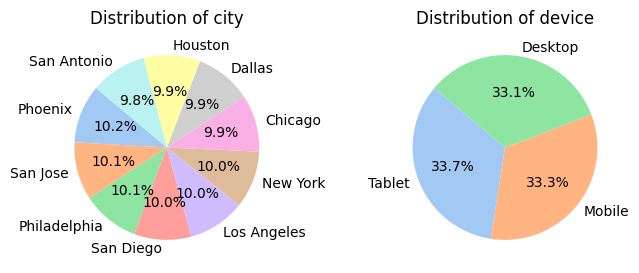

In [34]:
plt.figure(figsize=(8,3))
plt.subplot(121)
pie(df,'city')

plt.subplot(122)
pie(df,'device')

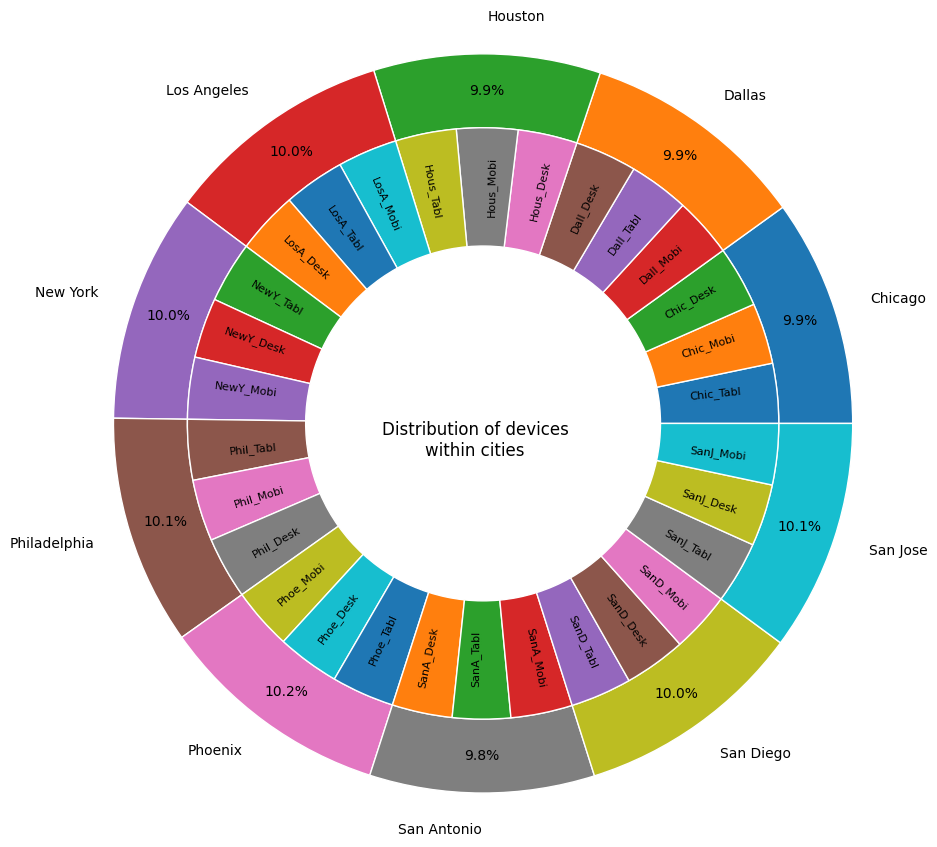

In [36]:
pie_city_device(df.loc[:,['city','device']])

Lets see withdrawals and deposits:
- in average people do higher deposits than withdrawals
- distributions seems to be bimodal

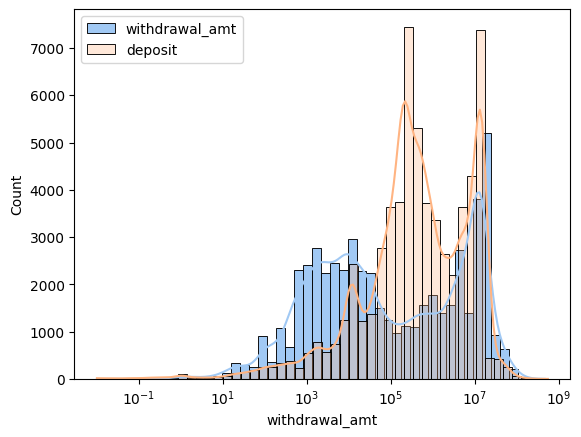

In [39]:
# withdrawal_amt
s = df.loc[~df.withdrawal_amt.isna(), 'withdrawal_amt']
sns.histplot(data=s, bins=50, kde=True, alpha=1, log_scale=True, label='withdrawal_amt')

# deposit_amt
s = df.loc[~df.deposit_amt.isna(), 'deposit_amt']
sns.histplot(data=s, bins=50, kde=True, alpha=0.3, log_scale=True, label='deposit')

plt.legend(); plt.plot(); plt.show()

some extra questions from this data:
- what device is associated to the highest transaction values?
- check transaction, with value range manage?
- is there any category value related to the value?